## 1. Import required Libraries

# TO remember


1.   All images were acquired,
resized, renamed, and attached
correctly in the corresponding
folders, meeting the
specifications.
The images are clear and
appropriately formatted for
the next stages of the task.
2.   Utilised advanced
libraries like
Cleanlab to
accurately identify
and report labeling
errors with detailed
stage-wise counts
and error types.
Comprehensive and
well-documented
analysis with clear
justification for the
methodology.
3. Preprocessing is
comprehensive and includes
steps like normalisation and
ensures resizing.
Dataset is split correctly into
training, validation, and testing
sets with an appropriate and
justified ratio.
Proper comments were given.
4. Well-designed CNN
architecture tailored
to the dataset, with
appropriate
selection and clear
justification of
activation functions
and optimisation
algorithms.
Implementation is
error-free, follows
good coding
practices, and
achieves initial
performance
metrics.
5. Significant efforts
to optimise model
performance
through advanced
techniques such as
data augmentation,
increasing layers,
filters, and
hyperparameter
tuning.
Comprehensive
analysis with
comparative results
and visualisations
(e.g., accuracy/loss
curves).
Well-documented
insights into what
improved
performance and
why.
6. Comprehensive
evaluation with
multiple
performance
metrics (accuracy,
loss, precision,
recall, F1-score).
Clear comparison of
training vs.
validation/test
results, with
visualisations
(accuracy/loss
curves) to
demonstrate
overfitting or
underfitting.
In-depth error
analysis provided,
with clear insights
into potential
improvements.



In [1]:
!pip install Pillow
from PIL import Image, UnidentifiedImageError
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import glob
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import random

!pip install cleanlab
from cleanlab.filter import find_label_issues

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 18.5 MB/s eta 0:00:00


## 2. Loading the Data

In [2]:
from google.colab import drive
# Set up the dataset
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/CHS2406_Coursework2_Data_Repository'

Mounted at /content/drive


In [3]:
# Specified image size
img_size = (150, 150, 3)

# Checks if a file is a valid image with the correct format and size
def is_valid_image(filepath):
    try:
        with Image.open(filepath) as img:
            # Check if the image format is one of PNG, JPG, or JPEG
            if img.format not in ('PNG', 'JPEG', 'JPG'):
                return False

            # Check if the image has the right size
            if img.size != (img_size[0], img_size[1]):
                return False

            # Verify the image integrity
            img.verify()
            return True

    # Handle exceptions
    except (IOError, UnidentifiedImageError):
        return False

# Filters valid images from a stage
def filter_stage_images(stage_path, limit=625):
    # List all files with any extension, filter valid images
    return [f for f in glob.glob(stage_path + '/*.*') if is_valid_image(f)][:limit]

# Initialize an empty dictionary to store the filtered image paths for each stage
stages = {}

# Loop through each stage
for i in range(1, 9):
    # Construct the path for the current stage directory
    stage_path = f"{dataset_path}/Stage{i}"
    # Filter valid images for the current stage and store them in the dictionary
    stages[f"stage_{i}"] = filter_stage_images(stage_path)

# Access the list of images for each stage
stage_1 = stages['stage_1']
stage_2 = stages['stage_2']
stage_3 = stages['stage_3']
stage_4 = stages['stage_4']
stage_5 = stages['stage_5']
stage_6 = stages['stage_6']
stage_7 = stages['stage_7']
stage_8 = stages['stage_8']

'''
This section of code is designed to validate and organize image data from the
dataset, ensuring that only good and correctly formatted images are
included for analysis. I used a validation function that
checks each file for proper format (PNG, JPEG, JPG), dimensions
(150x150 pixels), filtering out any corrupted or incompatible files. The code
then organizes these validated images into the separate stages (Stage1 to
Stage8), storing their file paths in a structured dictionary for easy access.
By limiting the number of images per stage (625), this wont go over the RAM
reqiuirements.
'''

'\nThis section of code is designed to validate and organize image data from the\ndataset, ensuring that only good and correctly formatted images are\nincluded for analysis. I used a validation function that\nchecks each file for proper format (PNG, JPEG, JPG), dimensions\n(150x150 pixels), filtering out any corrupted or incompatible files. The code\nthen organizes these validated images into the separate stages (Stage1 to\nStage8), storing their file paths in a structured dictionary for easy access.\nBy limiting the number of images per stage (625), this wont go over the RAM\nreqiuirements.\n'

In [4]:
# Print the number of samples in each stage
print(f"stage_1: {len(stage_1)}, stage_2: {len(stage_2)}, stage_3: {len(stage_3)}, stage_4: {len(stage_4)}, stage_5: {len(stage_5)}, stage_6: {len(stage_6)}, stage_7: {len(stage_7)}, stage_8: {len(stage_8)}")

# Empty lists to store image data and labels
data = []
labels = []

# Load, preprocess, and label images for stages - convert to numpy array and append to the right list

for i in stage_1:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(1)

for i in stage_2:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(2)

for i in stage_3:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(3)

for i in stage_4:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(4)

for i in stage_5:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(5)

for i in stage_6:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(6)

for i in stage_7:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(7)

for i in stage_8:
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= img_size)
    image=np.array(image)
    data.append(image)
    labels.append(8)


data = np.array(data)
labels = np.array(labels)

'''
This code loads and labels image data for eight stages, converting them into
NumPy arrays for machine learning. It then resizes each image to the specified
dimensions (150, 150, 3) and assigns labels. The processed data and labels are
stored in separate arrays to be prepared for model training.
'''


stage_1: 625, stage_2: 625, stage_3: 625, stage_4: 625, stage_5: 625, stage_6: 625, stage_7: 625, stage_8: 625


'\nThis code loads and labels image data for eight stages, converting them into\nNumPy arrays for machine learning. It then resizes each image to the specified\ndimensions (150, 150, 3) and assigns labels. The processed data and labels are\nstored in separate arrays to be prepared for model training.\n'

## 3. Data Labelling Errors

Uncertain predictions: 36
Labels passed to cleanlab: [4 6 3 4 3 2 6 5 6 1 4 6 2 4 6 2 2 2 2 2 3 6 2 3 1 4 3 1 4 3 3 3 5 3 1 1]
Prediction probabilities: (36, 8)
Number of label issues found: 17
Number of label issues 17
Indeces of label issues [31  3  7 12 18 26 13 17  9  6  0 35 30 15 19 21 16]


/usr/local/lib/python3.10/dist-packages/cleanlab/filter.py:904: UserWarning: May not flag all label issues in class: 0, it has too few examples (see `min_examples_per_class` argument)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/cleanlab/filter.py:904: UserWarning: May not flag all label issues in class: 7, it has too few examples (see `min_examples_per_class` argument)
  warnings.warn(


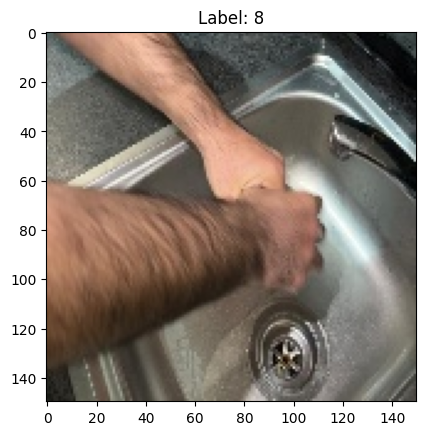

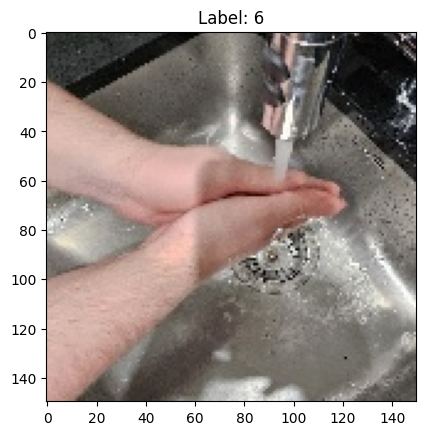

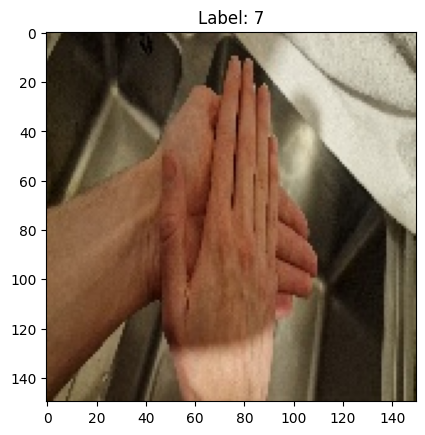

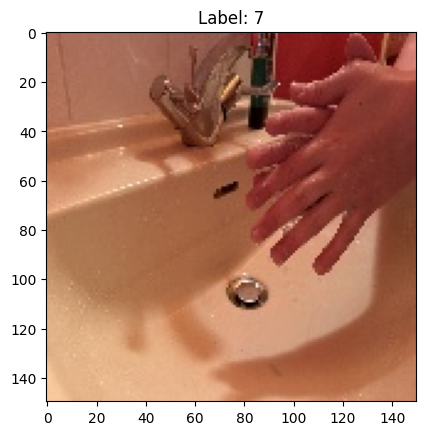

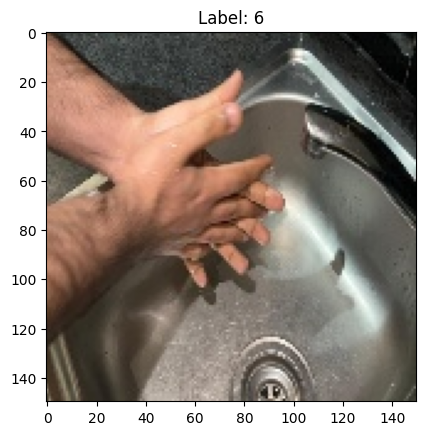

'\nThis code normalizes and flattens the image data and then splits it into\ntraining and validation sets. A Logistic Regression model is trained and\npredictions with low confidence are identified. These  predictions are analyzed\nusing CleanLab to detect potential label issues. The detected label issues are\nvisualized after to check if it is right.\n'

In [5]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from cleanlab.filter import find_label_issues

# Normalize the image data
normalised_data = data / 255.0

# Flatten the data for machine learning
flat_data = normalised_data.reshape(data.shape[0], -1)

# Encode labels
label_encoder = preprocessing.LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data
train_data, val_data, train_labels, val_labels = train_test_split(flat_data, encoded_labels, test_size=0.2, random_state=42)

# Standardize the data by scaling it
scaler = StandardScaler()
# Fit and transform the training data
train_data = scaler.fit_transform(train_data)
# Transform the validation data using the same scaler
val_data = scaler.transform(val_data)

# Use logistic regression model with max iterations set at 1000
model = LogisticRegression(max_iter=1000, random_state=42)
# Fit the model on the training data
model.fit(train_data, train_labels)

# Predict probabilities
pred_probs = model.predict_proba(train_data)

# Confidence
confidence_threshold = 0.8

# Empty list for uncertain perdictions
uncertain_predictions = []

# Loop over the predicted probabilities for each sample
for i, prob in enumerate(pred_probs):
    # Get the maximum predicted probability for each sample
    max_prob = np.max(prob)
    if max_prob < confidence_threshold:
        # If the maximum probability is below the confidence then mark as uncertain
        uncertain_predictions.append(i)

# Print the number of uncertain predictions
print("Uncertain predictions:", len(uncertain_predictions))
# Print the labels corresponding to the uncertain predictions
print("Labels passed to cleanlab:", train_labels[uncertain_predictions])
# Print the shape of prediction probabilities for uncertain predictions
print("Prediction probabilities:", pred_probs[uncertain_predictions].shape)

# Find label issues using CleanLab
label_issues = find_label_issues(train_labels[uncertain_predictions], pred_probs[uncertain_predictions], return_indices_ranked_by="self_confidence", verbose=True)

# Print the number of label issues detected
print("Number of label issues", len(label_issues))
# Print the indices of label issues
print("Indeces of label issues", label_issues)

# Visualise 5 images
for img in label_issues[:5]:
    # Show the image
    plt.imshow(data[uncertain_predictions[img]])
    # Display the label
    plt.title(f"Label: {train_labels[img]+1}")
    plt.show()

'''
This code normalizes and flattens the image data and then splits it into
training and validation sets. A Logistic Regression model is trained and
predictions with low confidence are identified. These  predictions are analyzed
using CleanLab to detect potential label issues. The detected label issues are
visualized after to check if it is right.
'''

In [6]:
# Delete variables no longer needed to free memory
del normalised_data, flat_data, label_encoder, scaler, pred_probs, uncertain_predictions, train_data, val_data, train_labels, val_labels

## Label errors:

<ol>
  <li>Explain what kind of errors you found in the dataset.</li>
  <li>List the total number of images left in each class/stage after the label error handling</li>
</ol>

<br>

<ol>
  <li>Stage 1: <<Number of images>></li>
  <li>Stage 2: <<Number of images>></li>
  <li>Stage 3: <<Number of images>></li>
  <li>Stage 4: <<Number of images>></li>
  <li>Stage 5: <<Number of images>></li>
  <li>Stage 6: <<Number of images>></li>
  <li>Stage 7: <<Number of images>></li>
  <li>Stage 8: <<Number of images>></li>
</ol>

## 4. Pre-process the Dataset

In [7]:
num_samples = 5000
# Randomly select indices for the reduced dataset
indices = np.random.choice(len(data), size=num_samples, replace=False)

# Create the reduced dataset
reduced_data = data[indices]
reduced_labels = labels[indices]



In [8]:
data = np.array(data)
labels = np.array(labels)

'''
This code reduces the dataset to 5,000 randomly selected samples to manage
memory usage. It creates a smaller dataset by selecting images and labels for
processing and training.'''

'\nThis code reduces the dataset to 5,000 randomly selected samples to manage\nmemory usage. It creates a smaller dataset by selecting images and labels for\nprocessing and training.'

## 5. Split the data
<br>

Split the data into training, validation and testing dataset using Startification, ensuring equal class distribution.

Choose appropriate values of training, validation and testing datasets.

Display total number of images in each dataset split.

In [9]:
# Split the reduced dataset into training, validation, and testing sets

# Split data into 70% training and 30% temporary set
X_train, X_temp, y_train, y_temp = train_test_split(
    reduced_data, reduced_labels, test_size=0.3, random_state=786, stratify=reduced_labels
)

# Split the temporary set into 50% validation and 50% testing (15% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=786, stratify=y_temp
)

# Normalize training data
X_train = X_train / 255.0
# Normalize validation data
X_val = X_val / 255.0
# Normalize testing data
X_test = X_test / 255.0

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=786, stratify=labels)

print("Total training intences: " + str(len(y_train)))
print("Train Data:" + str(np.unique(y_train, return_counts=True)))
print("Total testing intences: " + str(len(y_test)))
print("Test Data:" + str(np.unique(y_test, return_counts=True)))

Total training intences: 3500
Train Data:(array([1, 2, 3, 4, 5, 6, 7, 8]), array([438, 438, 437, 437, 437, 438, 437, 438]))
Total testing intences: 750
Test Data:(array([1, 2, 3, 4, 5, 6, 7, 8]), array([93, 93, 94, 94, 94, 94, 94, 94]))


In [11]:
print("\n\nBefore Reshaping the shape of train and test dataset:")
print(X_train.shape)
print(X_test.shape)
# Reshape the training data to number of samples, 150, 150, 3 for CNN input
X_train = X_train.reshape((X_train.shape[0], 150, 150, 3))
# Reshape the test data to number of samples, 150, 150, 3 for CNN input
X_test = X_test.reshape((X_test.shape[0], 150, 150, 3))
print("After Reshaping the shape of train and test dataset:")
print(X_train.shape)
print(X_test.shape)



Before Reshaping the shape of train and test dataset:
(3500, 150, 150, 3)
(750, 150, 150, 3)
After Reshaping the shape of train and test dataset:
(3500, 150, 150, 3)
(750, 150, 150, 3)


'\nThe code splits the reduced dataset into training, validation, and testing sets\nusing stratification, ensuring an equal distribution of classes across each\nsplit. The data is split with 70% for training, 15% for validation, and 15% for\ntesting. It also prints the total number of images in each dataset split,\nensuring the requirements of maintaining class balance and specifying dataset\nproportions are met.\n'

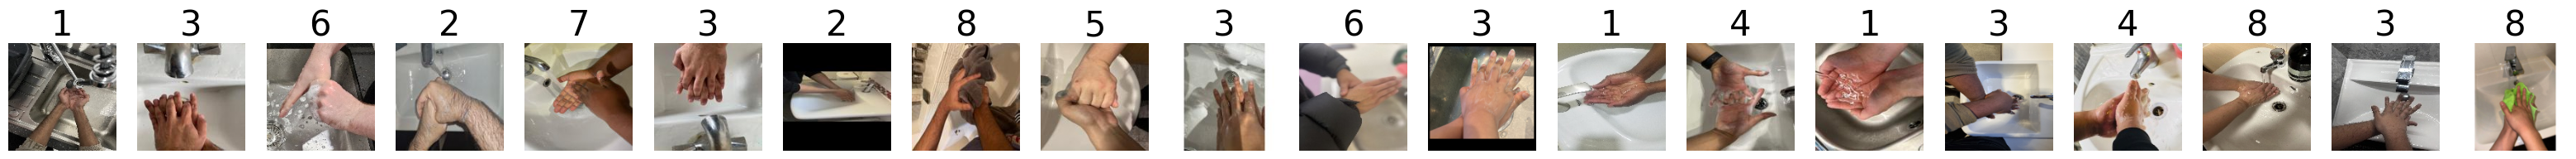

In [12]:
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(40,40))

# Define the number of images to display
num_images = 20

# Loop through the first 20 images in the training set
for i in range(num_images):
    # Select the image at index i
    row = X_train[i]
    # Get the label for the image
    label = y_train[i]

    # Assign the image to a variable
    image = row
    # Create a subplot to display each image in a single row
    plt.subplot(1, num_images, i+1)
    # Set the title of the image as the label
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

'''
The code splits the reduced dataset into training, validation, and testing sets
using stratification, ensuring an equal distribution of classes across each
split. The data is split with 70% for training, 15% for validation, and 15% for
testing. It also prints the total number of images in each dataset split,
ensuring the requirements of maintaining class balance and specifying dataset
proportions are met.
'''

## 6. Model Implementation

In [13]:
# from tensorflow import keras
# from tensorflow.keras import layers

# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    # Randomly rotate images by up to 15 degrees
    rotation_range=15,
    # Randomly shift images horizontally by up to 10%
    width_shift_range=0.1,
    # Randomly shift images vertically by up to 10%
    height_shift_range=0.1,
    # Randomly flip images horizontally
    horizontal_flip=True,
    # Randomly flip images vertically
    vertical_flip=True,
)

# Model Definition
model = tf.keras.Sequential([
    # Conv layer increased to 64 filters
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    # More convolutional layers 64 filters
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # MaxPooling layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    # More convolutional layers 128 filters
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # Flattening convert 2D matrix to a 1D vector
    tf.keras.layers.Flatten(),
    # Dense Layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),  # Added additional layer
    tf.keras.layers.Dense(64, activation='relu'),  # Added additional layer
    tf.keras.layers.Dense(10, activation='softmax')  # Changed output layer to 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

# Train the model with training data for 10 epochs
# model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Train the model with training data for 30 epochs as the training curve later on is still increasing
model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

# # Train the model using augmented data for 30 epochs
# history = model.fit(
#     # Use datagen.flow for augmented training
#     datagen.flow(X_train, y_train, batch_size=64),
#     epochs=30,
#     # Use validation data
#     validation_data=(X_val, y_val)
# )

# Train the model using augmented data for 50 epochs
history = model.fit(
    # Use datagen.flow for augmented training
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=50,
    # Use validation data
    validation_data=(X_val, y_val)
)

# Train the model (15 epochs instead of 10)
# model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

'''
This is a Convolutional Neural Network with data augmentation (rotation,
shifting, and flipping) to improve generalization. It uses 64 and 128 filters
and a softmax output for 10 classes. The model is trained for 10 epochs and
then augmented data is used for an additional 30 epochs to improve the model.
This will improve generalization and performance.
'''

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,976,842 (64.76 MB)

 Trainable params: 16,976,842 (64.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 45s 513ms/step - accuracy: 0.1081 - loss: 2.2544 - val_accuracy: 0.1240 - val_loss: 2.0862
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 47s 152ms/step - accuracy: 0.1541 - loss: 2.0836 - val_accuracy: 0.1453 - val_loss: 2.0770
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.1515 - loss: 2.0693 - val_accuracy: 0.1787 - val_loss: 2.0575
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.1822 - loss: 2.0459 - val_accuracy: 0.1653 - val_loss: 2.1457
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.2514 - loss: 1.9674 - val_accuracy: 0.2293 - val_loss: 2.0237
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.3592 - loss: 1.7625 - val_accuracy: 0.2893 - val_loss: 1.9696
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.5498 - loss: 1.3156 - val_accuracy: 0.2987 - val_loss: 2.4298
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.7583 - loss: 0.7528 - val_accur

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 28s 476ms/step - accuracy: 0.1531 - loss: 2.6962 - val_accuracy: 0.1613 - val_loss: 2.0545
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 34s 357ms/step - accuracy: 0.1708 - loss: 2.0673 - val_accuracy: 0.1720 - val_loss: 2.0397
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 365ms/step - accuracy: 0.1699 - loss: 2.0564 - val_accuracy: 0.1933 - val_loss: 2.0243
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 40s 358ms/step - accuracy: 0.1814 - loss: 2.0396 - val_accuracy: 0.2013 - val_loss: 2.0131
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 42s 366ms/step - accuracy: 0.1783 - loss: 2.0438 - val_accuracy: 0.2160 - val_loss: 2.0045
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 41s 367ms/step - accuracy: 0.1856 - loss: 2.0382 - val_accuracy: 0.2253 - val_loss: 1.9990
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 361ms/step - accuracy: 0.1837 - loss: 2.0331 - val_accuracy: 0.2107 - val_loss: 2.0075
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 23s 371ms/step - accuracy: 0.1955 - loss: 2.0207 - val_accuracy: 0.198

'\nThis is a Convolutional Neural Network with data augmentation (rotation,\nshifting, and flipping) to improve generalization. It uses 64 and 128 filters\nand a softmax output for 10 classes. The model is trained for 10 epochs and\nthen augmented data is used for an additional 30 epochs to improve the model.\nThis will improve generalization and performance.\n'

## 7. Evaluate the Model

In [14]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Evaluate the model on test data verbose output
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


Test Accuracy: 0.43
24/24 - 0s - 20ms/step - accuracy: 0.4280 - loss: 1.4989
Test accuracy: 0.43


### Training Curves

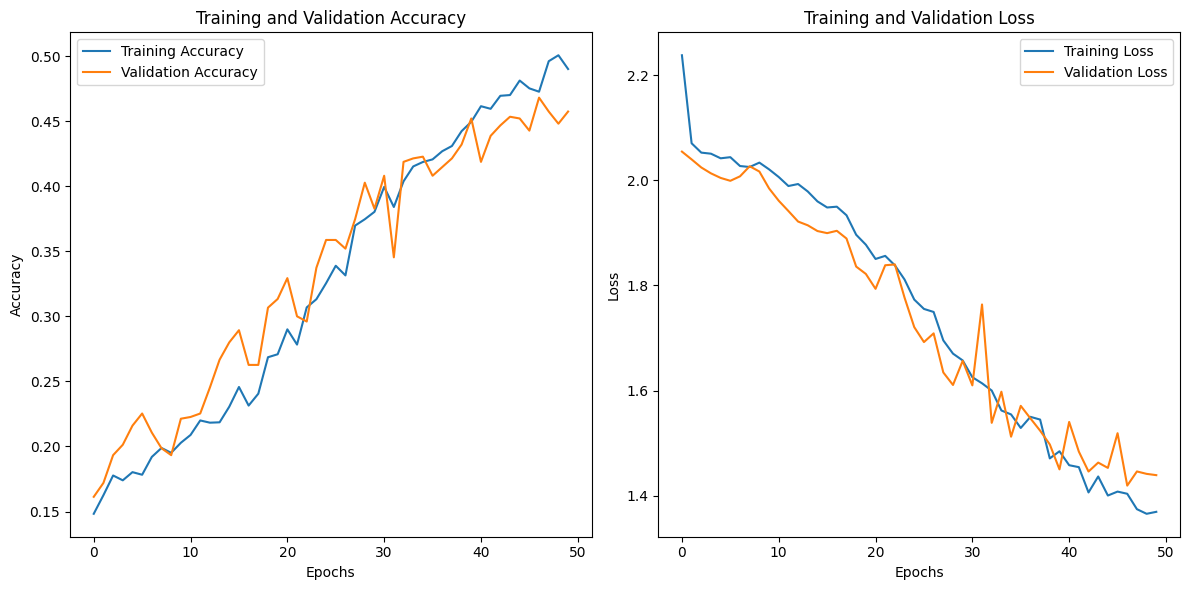

'\nThis code generates two side-by-side plots for training and validation accuracy\n nd the other for training and validation loss over epochs. It allows for\n comparison of model performance and error during training.\n'

In [15]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy
#Define the position of the subplot
plt.subplot(1, 2, 1)
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# Title of the accuracy plot
plt.title('Training and Validation Accuracy')
# X-axis label
plt.xlabel('Epochs')
# Y-axis label
plt.ylabel('Accuracy')
# Display legend
plt.legend()

# Loss
# Define the position of the subplot
plt.subplot(1, 2, 2)
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
# Title of the loss plot
plt.title('Training and Validation Loss')
# X-axis label
plt.xlabel('Epochs')
# Y-axis label
plt.ylabel('Loss')
# Display legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

'''
This code generates two side-by-side plots for training and validation accuracy
 nd the other for training and validation loss over epochs. It allows for
 comparison of model performance and error during training.
'''

### Make Inference
For some unseen data, make predictions using the trained model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


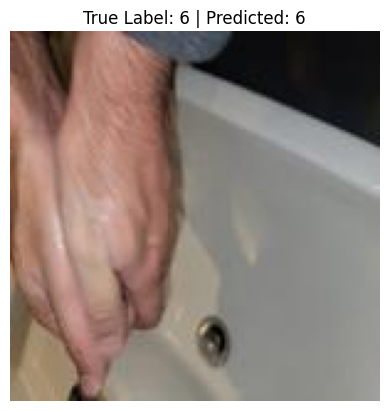

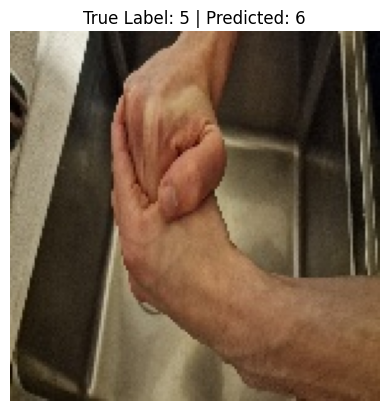

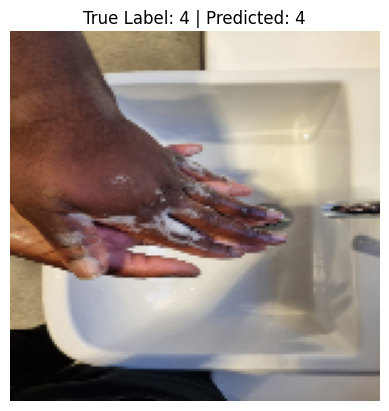

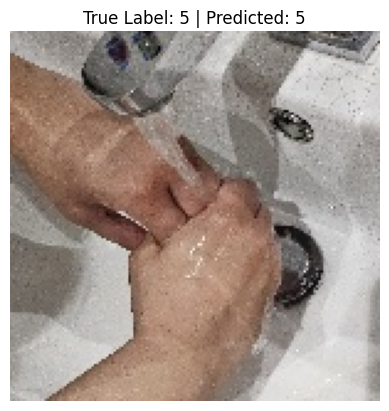

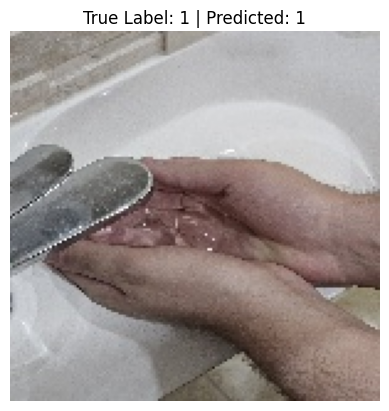

'\nThis code randomly selects 5 test samples, makes predictions using the trained\nmodel, and compares the predicted labels with the true labels. It displays the\nimages with their true and predicted labels for evaluation.\n'

In [18]:
import random
# Randomly select a few samples from the test set for "unseen" simulation
num_samples_to_test = 5
random_indices = random.sample(range(len(X_test)), num_samples_to_test)

# Simulate unseen data from test set
simulated_unseen_images = X_test[random_indices]
simulated_unseen_labels = y_test[random_indices]

# Make predictions on these samples
predictions = model.predict(simulated_unseen_images)
predicted_classes = np.argmax(predictions, axis=1)

# Display the images along with predicted and true labels
for i, idx in enumerate(random_indices):
    plt.imshow(simulated_unseen_images[i])
    true_label = simulated_unseen_labels[i]
    predicted_label = predicted_classes[i]
    plt.title(f"True Label: {true_label} | Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

'''
This code randomly selects 5 test samples, makes predictions using the trained
model, and compares the predicted labels with the true labels. It displays the
images with their true and predicted labels for evaluation.
'''